# Figure 2a

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

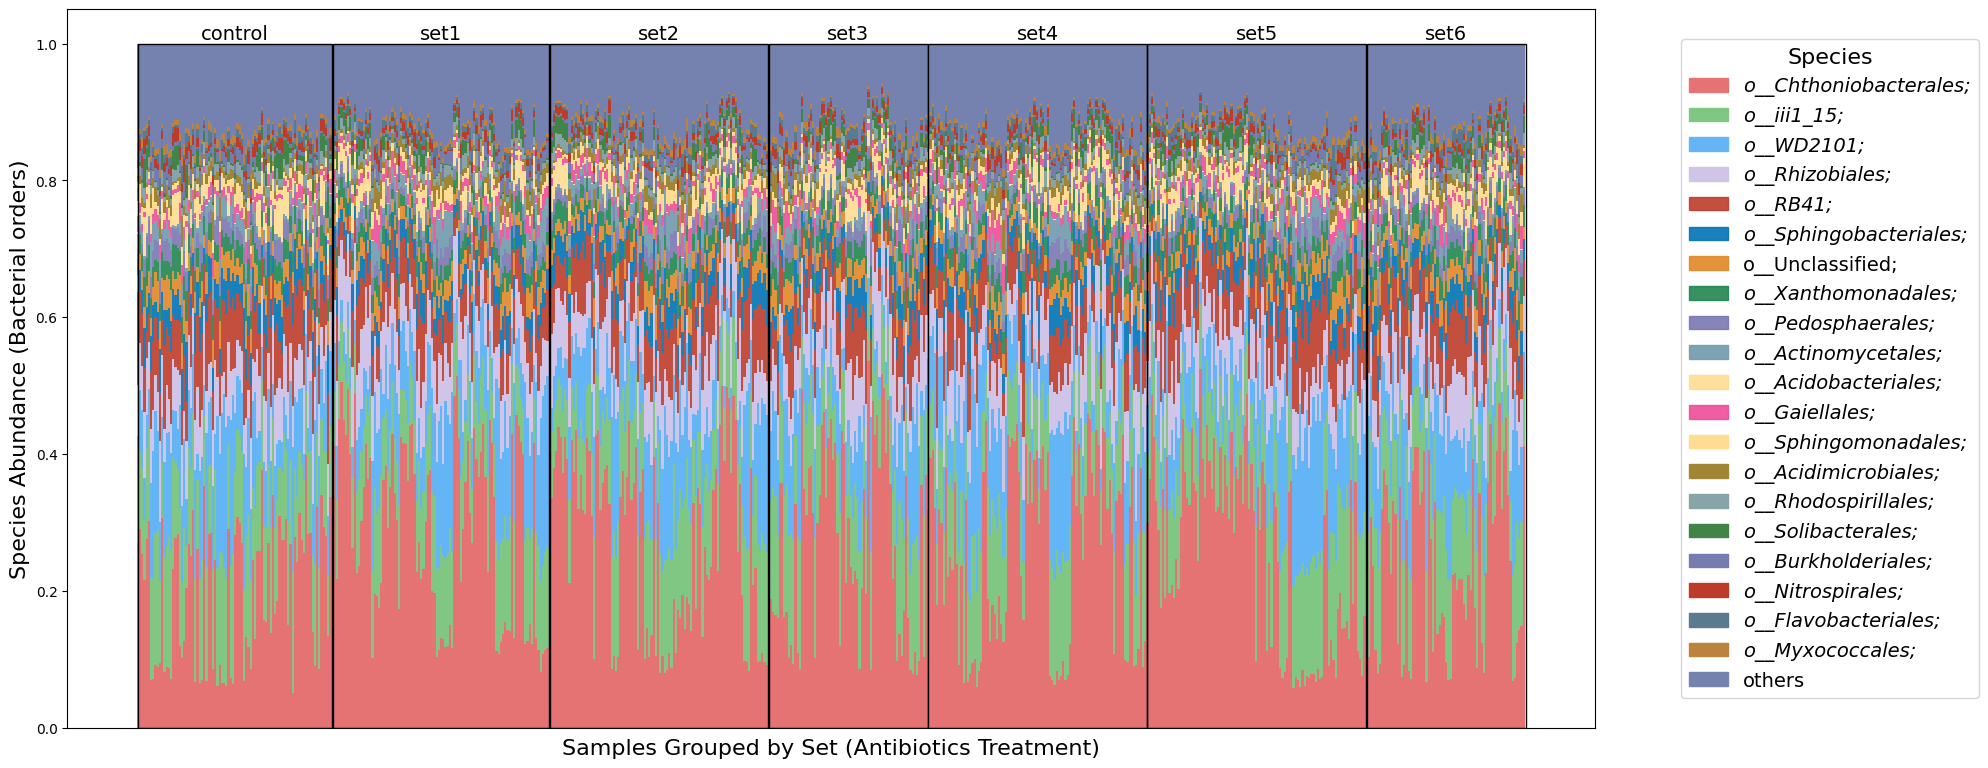

In [6]:
# %%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="posx and posy should be finite values")
# Read the data
data = pd.read_csv('../matrix/otu_merged_data.csv') 

# Define drug columns and 'others' column for later use
drug_columns = ['amoxicillin', 'oxytetracycline_dihydrate', 'sulfadiazine', 'trimethoprim', 'tylosin_tartrate', 'ciprofloxacin']
abundance_columns = data.columns.difference(drug_columns + ['SampleID', 'Group', 'Isolation_source'])

# Your custom mapping for sets
set_mapping = {
    (100, 100, 100, 100, 100, 50): 'set1',
    (100, 100, 100, 0, 0, 0): 'set2',
    (100, 0, 0, 0, 0, 0): 'set3',
    (10, 10, 10, 10, 10, 5): 'set4',
    (10, 10, 10, 0, 0, 0): 'set5',
    (10, 0, 0, 0, 0, 0): 'set6',
    (0, 0, 0, 0, 0, 0): 'control'
}

# Map the samples to sets
data['set'] = data[drug_columns].apply(tuple, axis=1).map(set_mapping)

# Sort the data by the new 'set' column
data.sort_values(by='set', inplace=True)

# Get the top 20 species
top_species = data[abundance_columns].mean().nlargest(20).index

# Add 'others' column
data['others'] = data[abundance_columns].drop(columns=top_species).sum(axis=1)

# Color mapping
colors = ['#e57373', '#81c784', '#64b5f6', '#d1c4e9','#BC3C29E5','#0072B5E5','#E18727E5','#20854EE5', '#7876B1E5', '#6F99ADE5', '#FFDC91E5', '#EE4C97E5',
          '#FFDC91', '#A08634', '#87A4A8', '#408547', '#767BB0', '#BC3C29', '#5A7B8F', '#BB833E', '#7581AF']

# Function to draw rectangles for sets
def draw_rectangle(ax, x_start, x_end, y_start, y_end, text):
    ax.add_patch(plt.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, fill=False, edgecolor='black', linewidth=1))
    ax.text((x_start + x_end) / 2, y_end, text, ha='center', va='bottom', fontsize=14)

# Create the plot
fig, ax = plt.subplots(figsize=(20, 8))
sample_labels = data['SampleID'].astype(str).values
grouped_labels = data['set'].values
bottom = np.zeros(len(sample_labels))

# Adjust the width of the bars to remove gaps between bars
bar_width = 1.0

# Initialize the x position to account for gaps between groups
x_pos = 0

# Initialize variables for drawing rectangles
current_set = None
x_start = None
gap = 0.2  # gap between groups

# Plot the bar chart
for i, (set_name, species_data) in enumerate(zip(grouped_labels, zip(*[data[species].values for species in list(top_species) + ['others']]))):
    for idx, abundance_value in enumerate(species_data):
        ax.bar(x_pos, abundance_value, bottom=bottom[i], color=colors[idx], edgecolor='none', width=bar_width)
        bottom[i] += abundance_value

    if current_set != set_name:
        if current_set is not None:
            draw_rectangle(ax, x_start, x_pos - gap, 0, bottom[i-1], current_set)
        x_start = x_pos
        current_set = set_name

    x_pos += bar_width  # increment the x position by the width of the bar

# Draw the last rectangle
draw_rectangle(ax, x_start, x_pos - gap, 0, bottom[-1], current_set)

# Adjust the plot
ax.set_xlabel('Samples Grouped by Set (Antibiotics Treatment)', fontsize=16)
ax.set_ylabel('Species Abundance (Bacterial orders)', fontsize=16)
# ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), title='Species', ncol=1, fontsize=14, labels=list(top_species) + ['others'], handles=[plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(top_species) + 1)])
# ax.set_title('(A) Species Abundance for All Samples Grouped by Sets', fontsize=26)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_xticklabels([])  # Remove x-axis labels

leg = ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), title='Species', title_fontsize=16, 
                ncol=1, fontsize=14, labels=list(top_species) + ['others'], 
                handles=[plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(top_species) + 1)])

for text in leg.get_texts():
    if text.get_text() not in ['o__Unclassified;', 'others']:
        text.set_style('italic')

plt.tight_layout()
# plt.savefig('stacked_bar_chart.pdf')
# plt.savefig('../figure/figure2a.pdf')

plt.show()
